In [48]:
import copy, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=4)

In [49]:
df= pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [50]:
df = df.sort_values(by='age').reset_index(drop=True)
df = pd.get_dummies(df, columns=['region'], prefix='region')
df.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,18,male,31.7,2,yes,34303.17,False,False,True,False
1,18,female,26.3,0,no,2198.19,True,False,False,False
2,18,male,23.3,1,no,1711.03,False,False,True,False
3,18,female,29.2,0,no,7323.73,True,False,False,False
4,18,male,53.1,0,no,1163.46,False,False,True,False


In [51]:
df.shape

(1338, 10)

In [52]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,18,1,31.7,2,1,34303.17,False,False,True,False
1,18,0,26.3,0,0,2198.19,True,False,False,False
2,18,1,23.3,1,0,1711.03,False,False,True,False
3,18,0,29.2,0,0,7323.73,True,False,False,False
4,18,1,53.1,0,0,1163.46,False,False,True,False


In [53]:
X=df[['age','bmi','children', 'smoker', 'sex', 'region_northwest', 'region_northeast', 'region_southeast', 'region_southwest']].astype(float).values
y_all=df['expenses'].values
avg= np.mean(X, axis=0)
dev= np.std(X, axis=0)
X_normalised= (X- avg)/dev


In [54]:
X_train=df.iloc[0:1300][['age','bmi','children', 'smoker', 'sex', 'region_northwest', 'region_northeast', 'region_southeast', 'region_southwest']].astype(float).values
y_train=df.iloc[0:1300]['expenses'].values
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.dtype)
y_train.shape

float64


(1300,)

In [55]:
avg= np.mean(X_train, axis=0)
dev= np.std(X_train, axis=0)
X_rescaled= (X_train- avg)/dev
print(X_train[0])
X_rescaled[0]

[18.  31.7  2.   1.   1.   0.   0.   1.   0. ]


array([-1.5062,  0.1773,  0.7379,  1.9857,  0.9878, -0.5643, -0.5667,
        1.6411, -0.5691])

In [56]:
def cost(x,y,w,b):
    m= x.shape[0]
    cost=0.0
    for i in range(m):
        cost+= ((np.dot(x[i],w)+b)- y[i])**2
    cost /=(2*m)
    return cost
    

In [57]:
def gradient(x,y,w,b):
    m, n = x.shape
    predictions = np.dot(x, w) + b
    errors = predictions - y
    dw = np.dot(x.T, errors) / m
    db = np.sum(errors) / m
    return dw, db
    

In [58]:
def descent(x,y,w,b, alpha, iterations):
    cost_hist=[]
    w_tmp= w;
    b_tmp= b;

    for i in range(iterations):
        dw, db= gradient(x,y,w_tmp, b_tmp)
        w_tmp= w_tmp- alpha* dw
        b_tmp= b_tmp- alpha* db
        if i<1000:
            cost_hist.append(cost(x,y,w_tmp, b_tmp))
        if i%100==0:
            print(f"Iteration {i:4d}: Cost {cost_hist[-1]:8.2f}   ")
    return w_tmp, b_tmp, cost_hist
    

In [59]:
def predict(x, w, b):
    y= np.dot(w,x)+b
    return y

In [60]:
m=X_train[0].shape
w_init= np.zeros(m)
b_init=0
alpha= 0.01
iterations= 1000
w_final, b_final, cost_track= descent(X_rescaled, y_train, w_init, b_init, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost 154012772.56   
Iteration  100: Cost 36656467.41   
Iteration  200: Cost 20873419.21   
Iteration  300: Cost 18690204.47   
Iteration  400: Cost 18382384.23   
Iteration  500: Cost 18338248.94   
Iteration  600: Cost 18331812.62   
Iteration  700: Cost 18330856.79   
Iteration  800: Cost 18330711.98   
Iteration  900: Cost 18330689.55   
b,w found by gradient descent: 13015.35,[3488.3677 2084.8053  538.7687 9560.6843  -86.5969  104.4608  276.4655
 -187.5424 -186.0203] 


In [61]:
print(X_rescaled[1])

[-1.5062 -0.7085 -0.9174 -0.5036 -1.0124 -0.5643  1.7646 -0.6094 -0.5691]


In [62]:
print(X_normalised[1329])
print(y_all[1329])

[ 1.7653  0.1041  0.7511  1.9706 -1.0105 -0.5664 -0.5653 -0.6113  1.7655]
47291.06


In [63]:
predict(X_normalised[1329], w_final, b_final)

np.float64(38293.44368698213)

In [64]:
y_pred = np.dot(X_rescaled, w_final) + b_final
y_pred

array([27009.8172,  1711.7054,  -108.1111, ..., 17952.4682, 15601.661 ,
       13536.854 ], shape=(1300,))

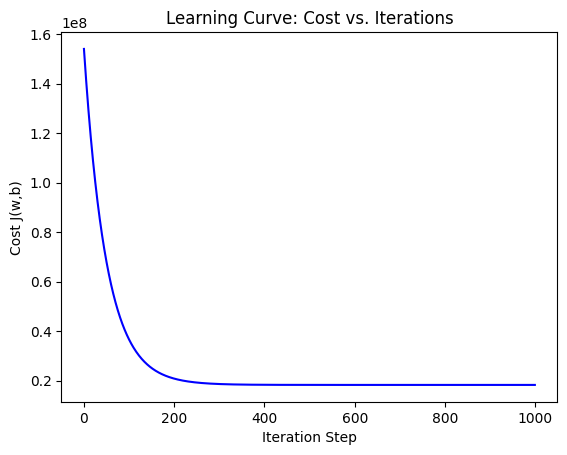

In [65]:
plt.plot(cost_track, color='blue')
plt.title("Learning Curve: Cost vs. Iterations") 
plt.xlabel("Iteration Step")                     
plt.ylabel("Cost J(w,b)")
plt.show()

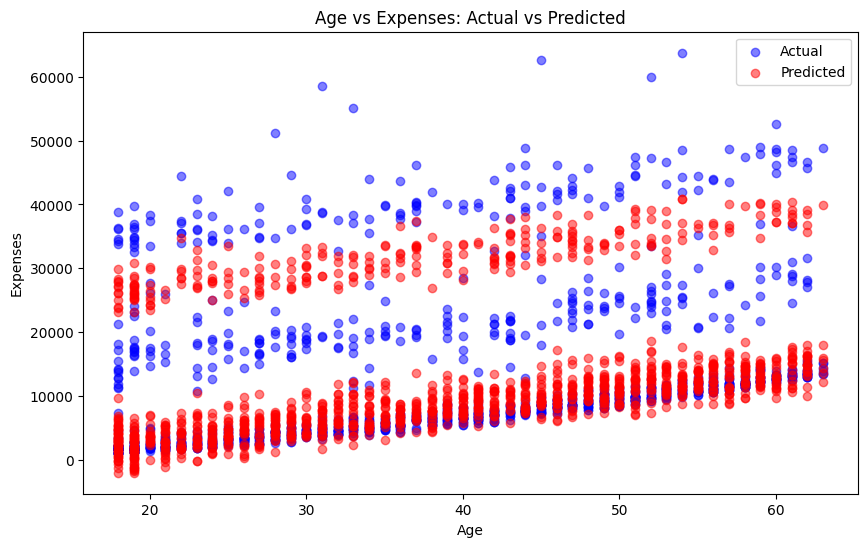

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:1300]['age'], y_train, color='blue', alpha=0.5, label='Actual')
plt.scatter(df.iloc[:1300]['age'], y_pred, color='red', alpha=0.5, label='Predicted')
plt.title("Age vs Expenses: Actual vs Predicted")
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.legend()
plt.show()

In [67]:
X_test = df.iloc[1300:][['age', 'bmi', 'children', 'smoker', 'sex', 
                             'region_northwest', 'region_northeast', 
                             'region_southeast', 'region_southwest']].values
y_test = df.iloc[1300:]['expenses'].values

In [68]:
X_test_rescaled = (X_test - avg) / dev